<br>
Mouhammad BAZZI

Student Number: A20522180


CS584- Fall 2022</br> <h1><br><b><font color='red'>Final Project</font></br></h1>

## **LIBRAIRIES IMPORTATION**

In [ ]:
###############################################
#LIBRAIRIES IMPORTATION
###############################################

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras import backend as K
import tensorflow as tf
from  sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

## **DATA IMPORTATION**

In [ ]:
###############################################
#DATA IMPORTATION
###############################################

# We want to import the data from the data folder
# in the data folder there is two folder one is Testing and another is Training
# in each folder there is 4 other folder one is glioma_tumor,meningioma_tumor,no_tumor and pituitary_tumor
# in each folder there is images of the tumor in a jpg format

###############################################


# We define some global variables
CATEGORIES = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"] # The different categories of the data
TRAINING_DIR = "H:/Desktop/Machine Learning/CS584-TumorsBrain/data/Training/" #The path of the training data
TESTING_DIR = "H:/Desktop/Machine Learning/CS584-TumorsBrain/data/Testing/" #The path of the testing data
IMG_SIZE = 256 #The image is going to be resized to 256*256


# We define two list one for the training data and another for the testing data
training_data = []
testing_data = []


# This function is going to read the image and convert it into a numpy array
# and then resize the image to IMG_SIZE*IMG_SIZE
# and then append the image and the class number to the training_data list if the parameter train is true else append to the testing_data list
def import_data(train = True):
    for category in CATEGORIES:
        if train:
            path = os.path.join(TRAINING_DIR, category)
        else:
            path = os.path.join(TESTING_DIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                if train:
                    training_data.append([new_array, class_num])
                else:
                    testing_data.append([new_array, class_num])
            except Exception as e:
                pass


#We are going to call the import_data function to import the training data and testing data
import_data(train = True)
import_data(train = False)

## **DATA VISUALIZATION**

In [ ]:
###############################################
#DATA VISUALIZATION
###############################################

# We are going to visualize the repartition of the data and plot some images from each class to see how the data looks like

###############################################


# This function is going to show the repartition of the images from each class
# If the parameter train is true it will show the repartition of the training data else it will show the repartition of the testing data
def visualize_data(train = True):
    glioma_tumor = 0
    meningioma_tumor = 0
    no_tumor = 0
    pituitary_tumor = 0
    data_set = training_data if train else testing_data
    for features, label in data_set:
        if label == 0:
            glioma_tumor += 1
        elif label == 1:
            meningioma_tumor += 1
        elif label == 2:
            no_tumor += 1
        elif label == 3:
            pituitary_tumor += 1
    data_set_name = "TRAINING" if train else "TESTING"
    print(data_set_name + " DATA SET:")
    print("glioma_tumor: ", glioma_tumor)
    print("meningioma_tumor: ", meningioma_tumor)
    print("no_tumor: ", no_tumor)
    print("pituitary_tumor: ", pituitary_tumor)
    print("Total number of images: ", glioma_tumor + meningioma_tumor + no_tumor + pituitary_tumor)
    plt.bar(["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"], [glioma_tumor, meningioma_tumor, no_tumor, pituitary_tumor])
    if train:
        plt.title("Training Data")
    else:
        plt.title("Testing Data")
    plt.show()
    print("")


# We are going to call the visualize_data function to visualize the repartition of the training data and testing data
visualize_data(train = True)
visualize_data(train = False)


# This function is going to show the images from each class
# If the parameter train is true it will show the images from the training data else it will show the images from the testing data
def show_image(train = True):
    data_set = training_data if train else testing_data
    data_set_name = "TRAINING" if train else "TESTING"
    print(data_set_name + " DATA SET:")
    #make a 4*4 grid and big size of each image
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    #glioma_tumor
    for features, label in data_set:
        if label == 0:
            axs[0, 0].imshow(features, cmap = "gray")
            axs[0, 0].set_title("glioma_tumor")
            break
    #meningioma_tumor
    for features, label in data_set:
        if label == 1:
            axs[0, 1].imshow(features, cmap = "gray")
            axs[0, 1].set_title("meningioma_tumor")
            break
    #no_tumor
    for features, label in data_set:
        if label == 2:
            axs[1, 0].imshow(features, cmap = "gray")
            axs[1, 0].set_title("no_tumor")
            break
    #pituitary_tumor
    for features, label in data_set:
        if label == 3:
            axs[1, 1].imshow(features, cmap = "gray")
            axs[1, 1].set_title("pituitary_tumor")
            break
    plt.show()


# We are going to call the show_image function to show the images from the training data and testing data
show_image(train = True)
show_image(train = False)


## **OPTIONAL DATA PRE-PROCESSING**

We apply a filter on each image to try to take advantage of the domain knowledge. We could use on of these 3 followings filters: Canny, Sobel and Laplacian.

### **Canny filter**

In [ ]:
#Apply the canny filter to the training data and testing data
def apply_canny(data_set, canny_threshold1 = 80, canny_threshold2 = 180):
    for features, label in data_set:
        features_before = features
        features = cv2.Canny(features, canny_threshold1, canny_threshold2)
    # Plot one image
    plt.subplot(121),plt.imshow(features_before, cmap = "gray")
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(features, cmap = "gray")
    plt.title('Edge Image (Canny)'), plt.xticks([]), plt.yticks([])
    plt.show()
    return data_set 

#Apply the canny filter to the training data and testing data
training_data = apply_canny(training_data)
testing_data = apply_canny(testing_data)



### **Sobel Filter**

In [ ]:
#Apply the sobel filter to the training data and testing data
def apply_sobel(data_set, kernel_size = 3):
    for features, label in data_set:
        features_before = features
        features = cv2.Sobel(features, cv2.CV_64F, 1, 0, ksize=kernel_size)
    # Plot one image
    plt.subplot(121),plt.imshow(features_before, cmap = "gray")
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(features, cmap = "gray")
    plt.title('Edge Image (Sobel)'), plt.xticks([]), plt.yticks([])
    plt.show()
    return data_set

#Apply the sobel filter to the training data and testing data
training_data = apply_sobel(training_data)
testing_data = apply_sobel(testing_data)


### **Laplacian filter**

In [ ]:
#Apply the laplacian filter to the training data and testing data
def apply_laplacian(data_set, kernel_size = 3):
    for features, label in data_set:
        features_before = features
        features = cv2.Laplacian(features, cv2.CV_64F, ksize=kernel_size)
    # Plot one image
    plt.subplot(121),plt.imshow(features_before, cmap = "gray")
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(features, cmap = "gray")
    plt.title('Edge Image (Laplacian)'), plt.xticks([]), plt.yticks([])
    plt.show()
    return data_set

#Apply the laplacian filter to the training data and testing data
training_data = apply_laplacian(training_data)
testing_data = apply_laplacian(testing_data)

## **DATA PRE-PROCESSING**

In [ ]:
###############################################
#DATA PRE-PROCESSING
###############################################

# We are going to pre-process the data
# To do that we will do the following steps:
# 1- Shuffle the data
# 2- Split the data into features and labels
# 3- Split the training data into training data and validation data
# 4- Normalize the data
# 5- One-hot encode the labels

################################################

# We define some global variables that we are going to use in the pre-processing 
VAL_RATIO = 0.2 # The ratio of the validation data

############################################################################################################
# 1- Shuffle the training data and testing data

random.shuffle(training_data)
random.shuffle(testing_data)

############################################################################################################
# 2- Separate the features and the labels for the training data and testing data

#We are going to separate the features and the labels for the training data
x_train = []
y_train = []
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
#We are going to separate the features and the labels for the testing data
x_test = []
y_test = []
for features, label in testing_data:
    x_test.append(features)
    y_test.append(label)

############################################################################################################
# 3- Split the training data into training data and validation data

val_size = int(len(x_train) * VAL_RATIO)
x_val = x_train[:val_size]
y_val = y_train[:val_size]
x_train = x_train[val_size:]
y_train = y_train[val_size:]

############################################################################################################
# 4&5- Normalize the training, validation and testing data and one-hot encode the labels

#We are going to normalize the training data by dividing it by 255
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

#We are going to convert the labels to one-hot vectors
y_train = to_categorical(y_train, num_classes = 4)
y_val = to_categorical(y_val, num_classes = 4)
y_test = to_categorical(y_test, num_classes = 4)


## **FIRST MODEL: A SIMPLE NEURAL NETWORK**

### **Model Architecture & Model Training**

In [ ]:
###############################################
#FIRST MODEL: A SIMPLE NEURAL NETWORK
###############################################

# We are going to build a simple neural network model

############################################################################################################
# 1- Build a simple neural network model & Compile the model

# We are going to build a simple neural network model
def build_and_compile_ann_model():
    model = Sequential()
    model.add(Flatten(input_shape = (IMG_SIZE, IMG_SIZE, 1)))
    model.add(Dense(256, activation = "relu"))
    model.add(Dense(128, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = "relu"))
    model.add(Dense(4, activation = "softmax"))
    # We are going to compile the model
    model.compile(optimizer = Adam(learning_rate = 0.0005), loss = "categorical_crossentropy", metrics = ["accuracy"])
    return model

model = build_and_compile_ann_model()
model.summary()

############################################################################################################
# 2- Train the model

# We are going to train the model
history = model.fit(x_train, y_train, epochs = 1, batch_size = 32, validation_data = (x_val, y_val))

############################################################################################################
# 3- Plot the training and validation accuracy and loss

# We are going to plot the training and validation accuracy and loss
def plot_accuracy_loss(history):
    plt.figure(figsize = (10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label = "Training Accuracy")
    plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label = "Training Loss")
    plt.plot(history.history["val_loss"], label = "Validation Loss")
    plt.legend()
    plt.title("Loss")
    plt.show()


# We plot the training and validation accuracy and loss
plot_accuracy_loss(history)




### **Model Evaluation**

Epoch 1/3
90/90 [==============================] - 16s 130ms/step - loss: 1.8301 - accuracy: 0.4038 - val_loss: 1.7117 - val_accuracy: 0.3020
Epoch 2/3
90/90 [==============================] - 10s 114ms/step - loss: 1.0819 - accuracy: 0.5422 - val_loss: 1.5443 - val_accuracy: 0.2843
Epoch 3/3
13/13 [==============================] - 0s 21ms/step - loss: 1.4011 - accuracy: 0.3934
Test Accuracy: 0.39340102672576904
13/13 [==============================] - 1s 24ms/step


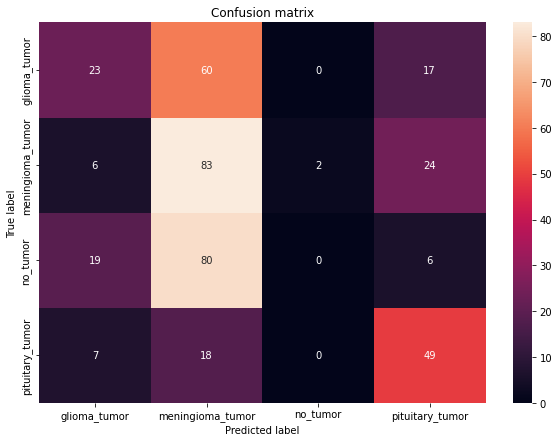

In [83]:
# After tuning the hyperparameters we now train on our entire training data and evaluate on the testing data

############################################################################################################
# 4- Train the model on the entire training data

# We compile again the model
model = build_and_compile_ann_model()

# We concatenate the training data and the validation data
x_train_val = np.concatenate((x_train, x_val), axis = 0)
y_train_val = np.concatenate((y_train, y_val), axis = 0)

# We train the model on the entire training data
history = model.fit(x_train_val, y_train_val, epochs = 3, batch_size = 32, verbose = 1)


############################################################################################################
# 5- Evaluate the model on the testing data

# We evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy: " + str(test_accuracy))

# Confusion Matrix

# We compute the predictions
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)

# We store the true labels
y_true = np.argmax(y_test, axis = 1)

# We compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# We plot the confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in CATEGORIES],
                    columns = [i for i in CATEGORIES])
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


### **We save the model**

In [ ]:
# 6- Save the model

# We save the model
model.save("model_ANN.h5")

## **SECOND MODEL: A CONVOLUTIONAL NEURAL NETWORK**

### **Model Architectue & Compilation**

In [ ]:
# SECOND MODEL: A CONVOLUTIONAL NEURAL NETWORK
#####################################################

#We are going to build a convolutional neural network model

############################################################################################################
# 1- Build a convolutional neural network model & Compile the model

def build_and_compile_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation = "relu", input_shape = (IMG_SIZE, IMG_SIZE, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation = "relu"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation = "relu"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation = "relu"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(512, (3, 3), activation = "relu"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dense(32, activation = "relu"))
    model.add(Dense(4, activation = "softmax"))
    model.compile(optimizer = Adam(learning_rate = 0.0001), loss = "categorical_crossentropy", metrics = ["accuracy"])
    return model

model = build_and_compile_cnn_model()
model.summary()

### **Load the images with ImageDataGenerator**

The following cell is to be used if we want to pre-process the images by applying a filter on them (Canny, Sobel or Laplacian filter).

In [ ]:
############################################################################################################
# - If we want to apply a filter before ImageDataGenerator to the images we can do it here

# Please select a number between 1 and 3:
#   CANNY FILTER = 1
#   SOBEL FILTER  = 2
#   LAPLACIAN FILTER = 3
#   NO FILTER = 0

filter_number = 0

#We create a function to apply a filter to the images
def apply_filter(image, filter_number=0, canny_threshold1 = 80, canny_threshold2 = 180, sobel_ksize = 3, laplacian_ksize = 3):
    if filter_number == 1:
        image = cv2.Canny(image, canny_threshold1, canny_threshold2)
    elif filter_number == 2:
        image = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = sobel_ksize)
    elif filter_number == 3:
        image = cv2.Laplacian(image, cv2.CV_64F, ksize = laplacian_ksize)
    else:
        image = image
    return image

In [ ]:
############################################################################################################
# 2- Load the data using ImageDataGenerator

# We define some global variables
WITH_DATA_AUGMENTATION = False # Whether to use data augmentation or not
CATEGORIES = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"] # The categories
TRAINING_DIR = "H:/Desktop/Machine Learning/CS584-TumorsBrain/data/Training/" # The training directory
TESTING_DIR = "H:/Desktop/Machine Learning/CS584-TumorsBrain/data/Testing/" # The testing directory
IMG_SIZE = 256 # The image size
VAL_RATIO = 0.2 # The ratio of the validation data

################################################


# We are going to load the data using ImageDataGenerator (we define the generator)
if WITH_DATA_AUGMENTATION:
    train_datagen = ImageDataGenerator(rescale = 1./255,
                                        rotation_range = 40,
                                        width_shift_range = 0.2,
                                        height_shift_range = 0.2,
                                        shear_range = 0.2,
                                        zoom_range = 0.2,
                                        horizontal_flip = True,
                                        fill_mode = "nearest",
                                        validation_split = VAL_RATIO,
                                        preprocessing_function = lambda x: apply_filter(x, filter_number))
    train_val_datagen = ImageDataGenerator(rescale = 1./255,
                                            rotation_range = 40,
                                            width_shift_range = 0.2,
                                            height_shift_range = 0.2,
                                            shear_range = 0.2,
                                            zoom_range = 0.2,
                                            horizontal_flip = True,
                                            fill_mode = "nearest",
                                            preprocessing_function = lambda x: apply_filter(x, filter_number))
else:
    train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = VAL_RATIO, preprocessing_function = lambda x: apply_filter(x, filter_number))
    train_val_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function = lambda x: apply_filter(x, filter_number))
val_datagen = ImageDataGenerator(rescale = 1./255, validation_split = VAL_RATIO, preprocessing_function = lambda x: apply_filter(x, filter_number))
test_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function = lambda x: apply_filter(x, filter_number))


# We load the training data
training_set = train_datagen.flow_from_directory(TRAINING_DIR
                                                , target_size = (IMG_SIZE, IMG_SIZE)
                                                , batch_size = 32
                                                , class_mode = "categorical"
                                                , subset = "training"
                                                , shuffle = True
                                                , seed = 42
                                                , color_mode = "grayscale")

# We load the validation data
validation_set = val_datagen.flow_from_directory(TRAINING_DIR
                                                , target_size = (IMG_SIZE, IMG_SIZE)
                                                , batch_size = 32
                                                , class_mode = "categorical"
                                                , subset = "validation"
                                                , shuffle = True
                                                , seed = 42
                                                , color_mode = "grayscale")

# We load the testing data
testing_set = test_datagen.flow_from_directory(TESTING_DIR
                                                , target_size = (IMG_SIZE, IMG_SIZE)
                                                , batch_size = 32
                                                , class_mode = "categorical"
                                                , shuffle = False
                                                , seed = 42
                                                , color_mode = "grayscale")

# We load the training and validation data together
training_val_set = train_val_datagen.flow_from_directory(TRAINING_DIR
                                                        , target_size = (IMG_SIZE, IMG_SIZE)
                                                        , batch_size = 32
                                                        , class_mode = "categorical"
                                                        , shuffle = True
                                                        , seed = 42
                                                        , color_mode = "grayscale")


### **Model Training**

In [ ]:
############################################################################################################
# 3- Train the model & Plot the training and validation accuracy and loss

# We build & compile the model
model = build_and_compile_cnn_model()


# We train the model
step_per_epoch = training_set.n // training_set.batch_size
validation_steps = validation_set.n // validation_set.batch_size
history = model.fit(training_set, epochs = 2, steps_per_epoch = step_per_epoch, validation_data = validation_set, validation_steps = validation_steps, verbose = 1)

# We plot the training and validation accuracy and loss

# We define a function to plot the training and validation accuracy and loss
def plot_accuracy_loss(history):
    plt.figure(figsize = (15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label = "Training Accuracy")
    plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label = "Training Loss")
    plt.plot(history.history["val_loss"], label = "Validation Loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

# We plot the training and validation accuracy and loss
plot_accuracy_loss(history)


### **Model Evaluation**

In [ ]:
# After tuning the hyperparameters we now train on our entire training data and evaluate on the testing data

############################################################################################################
# 4- Train the model on the entire training data

# We compile again the model
model = build_and_compile_cnn_model()

# We train the model on the entire training data
step_per_epoch = training_val_set.n // training_val_set.batch_size
history = model.fit(training_val_set, epochs = 1, steps_per_epoch = step_per_epoch, verbose = 0)

############################################################################################################
# 5- Evaluate the model on the testing data

# We evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(testing_set, verbose = 0)
print("Test Accuracy: " + str(test_accuracy))

# Confusion Matrix

# We compute the predictions
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)

# We store the true labels
y_true = np.argmax(y_test, axis = 1)

# We compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# We plot the confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in CATEGORIES],
                    columns = [i for i in CATEGORIES])
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


### **Visualization of the activation filters**


We want to vizualize what are the output of each convolution layer for a given input to understand better what the Model has leraned.

In [ ]:
############################################################################################################
# A- Visualize the output of each activation layer of the model for a given image

# We define some global variables
IMG_PATH = "H:/Desktop/Machine Learning/CS584-TumorsBrain/data/Testing/glioma_tumor/image(1).jpg" # The path of the image

# We define a pre-processing function
def preprocess_image(img_path = IMG_PATH):
    img = image.load_img(img_path, target_size = (IMG_SIZE, IMG_SIZE), color_mode = "grayscale")
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    img = img / 255
    return img

# We define a function to visualize the output of each activation layer of the model for a given image
def visualize_activation_layers(img_path = IMG_PATH):
    img = preprocess_image(img_path)

    # We get the output of each activation layer of the model
    layers_output = [layer.output for layer in model.layers if "conv" in layer.name]

    # We create a model that will return these outputs, given the model input
    activation_model = models.Model(inputs = model.input, outputs = layers_output)

    # We run the model in predict mode
    activations = activation_model.predict(img, verbose = 0)

    # We get the names of the layers
    layer_names = []
    for layer in model.layers:
        if "conv" in layer.name:
            layer_names.append(layer.name)

    # We display the feature maps
    images_per_row = 16

    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype("uint8")
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize = (scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect = "auto", cmap = "viridis")


# We visualize the output of each activation layer of the model for a given image
visualize_activation_layers()

### **Visualization of the filters learned by the Convolutional layers**

We want now to visualize what input maximize the activation of a given filter, in another way we want to see which filter is learned. For that we will use Gradient Ascent.

In [ ]:
############################################################################################################
# B- Visualization of the filters learned by the convolutional layers of the model using gradient ascent

# We disable eager execution
tf.compat.v1.disable_eager_execution() 

# We define a function that will deprocess the image
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    x += 0.5
    x = np.clip(x, 0, 1)

    x *= 255
    x = np.clip(x, 0, 255).astype("uint8")
    return x

# We define a function to visualize the filters learned by the convolutional layers of the model using gradient ascent
def visualize_filters():
    # We get the output of each activation layer of the model
    layers_output = [layer.output for layer in model.layers if "conv" in layer.name]

    # We create a model that will return these outputs, given the model input
    activation_model = models.Model(inputs = model.input, outputs = layers_output)

    # We get the names of the layers
    layer_names = []
    for layer in model.layers:
        if "conv" in layer.name:
            layer_names.append(layer.name)

    # We define a loss function that maximizes the activation of the nth filter of the layer considered
    for layer_name in layer_names:
        layer_output = activation_model.get_layer(layer_name).output
        loss = K.mean(layer_output[:, :, :, 0])

        # We compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # We normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # We define a Keras function that returns the loss and gradients given the input picture
        iterate = K.function([model.input], [loss, grads])

        # We start from a gray image with some noise
        input_img_data = np.random.random((1, IMG_SIZE, IMG_SIZE, 1)) * 20 + 128.

        # We run gradient ascent for 40 steps
        step = 1.
        for i in range(40):
            loss_value, grads_value = iterate([input_img_data])
            input_img_data += grads_value * step

        # We decode the resulting input image
        img = input_img_data[0]
        img = deprocess_image(img)

        # We display the result
        plt.figure(figsize = (10, 10))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(img[:, :, 0], cmap = "viridis")
        plt.show()


# We visualize the filters learned by the convolutional layers of the model using gradient ascent
visualize_filters()



### **Visualizing class activation heat map**

In [ ]:
############################################################################################################
# C- Visualization of the class activation heatmap of the model for a given image

IMG_PATH = "H:/Desktop/Machine Learning/CS584-TumorsBrain/data/Testing/meningioma_tumor/image(" # The path of the image

# We define a function that will preprocess the image
def preprocess_image(img_path = IMG_PATH):
    img = image.load_img(img_path, target_size = (IMG_SIZE, IMG_SIZE), color_mode = "grayscale")
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    img = img / 255
    return img

# We define a function to visualize the class activation heatmap of the model for a given image
def visualize_class_activation_heatmap(img_path = IMG_PATH):

    # We preprocess the image
    img = preprocess_image(img_path)

    # We get the output of the last convolutional layer of the model
    all_conv_layers = [layer for layer in model.layers if "conv" in layer.name]
    last_conv_layer = all_conv_layers[-1]
    last_conv_layer_output = last_conv_layer.output

    # We get the output of the last fully connected layer of the model
    all_fc_layers = [layer for layer in model.layers if "dense" in layer.name]
    last_fc_layer = all_fc_layers[-1]
    last_fc_layer_output = last_fc_layer.output

    # We get the class activation heatmap
    grads = K.gradients(last_fc_layer_output, last_conv_layer_output)[0]
    pooled_grads = K.mean(grads, axis = (0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer_output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([img])

    for i in range(pooled_grads.shape[0]):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis = -1)

    # We post-process the class activation heatmap
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    # We display the original image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # We do a figure composed of 2 subplots (1 for the original image and 1 for the superimposed heatmap)
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img)
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    #plt.figure(figsize = (10, 10))
    #plt.subplot(1, 2, 1)
    #plt.title("Original image")
    #plt.grid(False)
    #plt.imshow(img)

    # We display the class activation heatmap
    #plt.figure(figsize = (10, 10))
    #plt.title("Class activation heatmap")
    #plt.grid(False)
    #plt.imshow(heatmap, cmap = "viridis")
    #plt.show()
    
    # We superimpose the class activation heatmap on the original image
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * 0.4 + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)
    superimposed_img = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
    # We display the superimposed image
    ax[1].imshow(superimposed_img)
    ax[1].set_title("Class activation heatmap superimposed on the original image")
    ax[1].axis("off")
    plt.show()
    return


# We visualize the class activation heatmap of the model for a given image
for i in range(1, 100): # TODO: change the range
    try:
        visualize_class_activation_heatmap(IMG_PATH + str(i) + ").jpg")
    except:
        pass


### **We save the model**

In [ ]:
############################################################################################################
# 6- We save the model

# We save the model
model.save("model_CNN.h5")